# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Scoping

It's beneficial to create a project scope whenever a new project is being started. Four sections were created below to help guide the project's process and progress. The first section is the project goals, this section will define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and questions that are aligned with the project goals. Lastly, evaluation will help us build conclusions and findings from our analysis.

### Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 

### Evaluation

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

D:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [3]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [5]:
observations.park_name.nunique()

4

In [6]:
print(f"number of observed national parks {observations.park_name.nunique()}")
print(f"observed national parks {observations.park_name.unique()}")

number of observed national parks 4
observed national parks ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [7]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [8]:
print("Amount of different categories {}".format(species.category.nunique()))
print("different categories {}".format(species.category.unique()))

Amount of different categories 7
different categories ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [9]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [10]:
print(f"number of different species: {species.scientific_name.nunique()}")

number of different species: 5541


#### Species conservation status

In [11]:
print(f"different conservation status: {species.conservation_status.nunique()}")
print(f"name of different conservation status: {species.conservation_status.unique()}")

different conservation status: 4
name of different conservation status: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


as we can see the column conservation_status contains null values which need to be filled.

In [12]:
species.isnull().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

only 191 rows have no null values out of 5824 rows in the species dataframe 

In [13]:
species.groupby('conservation_status').size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

In [14]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

### Analysis

This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the `conservation_status` column in `species`. 

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `least-concern`, which describes that a species is plenty full in the wild and are  not being a focus of species conservation. [1]

In [15]:
species.fillna('least-concern', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
Species of Concern     161
Threatened              10
least-concern         5633
dtype: int64

##### Endagered Species

now we want to see if any species is more endagered than an other one

In [16]:
conservation_animals = species[species.conservation_status!='least-concern'].groupby(['conservation_status','category'])\
                        ['scientific_name'].count().unstack()

In [17]:
conservation_animals

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


In [18]:
conservation_animals.head()

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0, 0.5, 'Number of species')

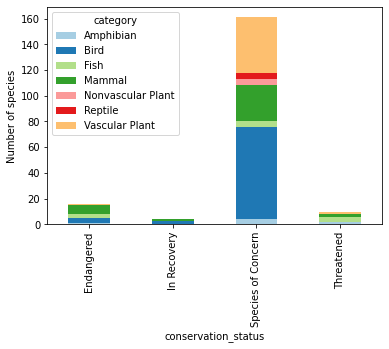

In [19]:
col = sns.color_palette("Paired", 11)

ax = conservation_animals.plot(kind="bar",color=col, stacked=True)
ax.set_xlabel("conservation_status")
ax.set_ylabel("Number of species")

#### Findings conservation status

Endangered: Birds and Mamals are most endangered with 4 and 7 species <br>
In Recovery: only three Bird species and 1 mamal are in recovery <br>
Species of Concern: 72 Birds, 43 vascular plants* and 28 mamals are species of concern <br>
Threatened: 4 fish species, 2 mamals, amphibians and vascular plants are threatened <br>



*Vascular Plant are any plants that are "vascular tissue" which are made up of xylem and phloem tissues.
Those tissues carry minerals, nutrients and water through the plant.
The attached picture shows an example for vascular and non-vascular plants.
Non-vascular plants can be mosses. Vascular plants include leaf plants like trees or farns. [2] 

<br>


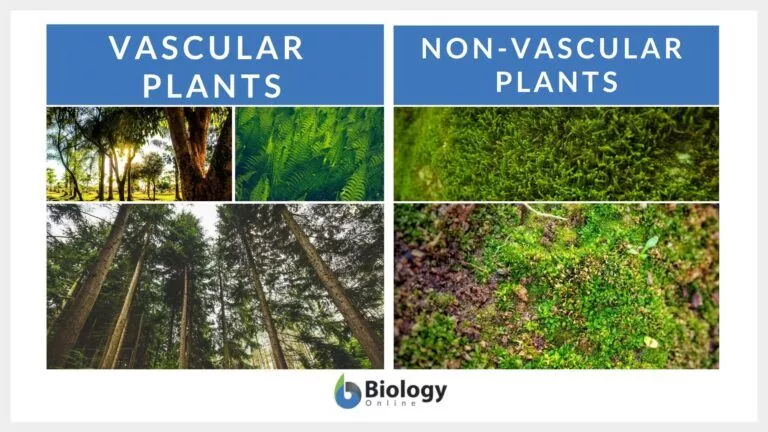

#### new variable is_protected

a new column / feature will be created which is called `ìs_protected` with this feature we will classify a species in either if its protected or not
which means if the `conservation_status != "least-concern"` the species needs to be protected.

In [20]:
species['is_protected'] = species['conservation_status'] != 'least-concern'

In [21]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [22]:
category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


In [23]:
species['is_protected'] = species['conservation_status'] != 'least-concern'

In [24]:
species['is_protected'].value_counts()

False    5633
True      191
Name: is_protected, dtype: int64

In [25]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [11, 115]]
chi2_contingency(contingency1)

(3.647651024981415,
 0.0561483484489001,
 1,
 array([[ 23.89403974, 152.10596026],
        [ 17.10596026, 108.89403974]]))

In [26]:
contingency2 = [[30, 146],
              [46, 4216]]
chi2_contingency(contingency2)

(246.5870424874456,
 1.4405067309854046e-55,
 1,
 array([[3.01397026e+00, 1.72986030e+02],
        [7.29860297e+01, 4.18901397e+03]]))

### Join both dataframes

joining observations with species 

In [27]:
df_new = pd.merge(observations, species, how='inner')

In [28]:
df_new.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",least-concern,False
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",least-concern,False
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",least-concern,False
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",least-concern,False
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,least-concern,False


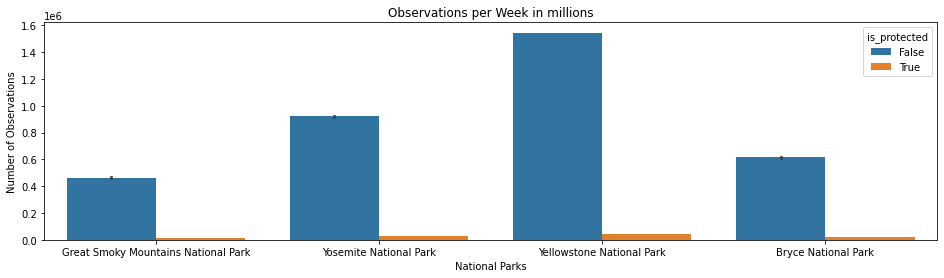

In [59]:
plt.figure(figsize=(16, 4))
sns.barplot(x=df_new.park_name, y= df_new.observations, hue=df_new.is_protected, estimator=sum)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations per Week in millions')
plt.show()

In [40]:
species_list = species.category.unique()

In [58]:
#df_new.groupby(by=['park_name', 'category','is_protected'])['observations'].sum()
df_new.groupby(by=['park_name','is_protected'])['observations'].sum()

park_name                            is_protected
Bryce National Park                  False            614682
                                     True              18609
Great Smoky Mountains National Park  False            462047
                                     True              12816
Yellowstone National Park            False           1543058
                                     True              44583
Yosemite National Park               False            922539
                                     True              26913
Name: observations, dtype: int64

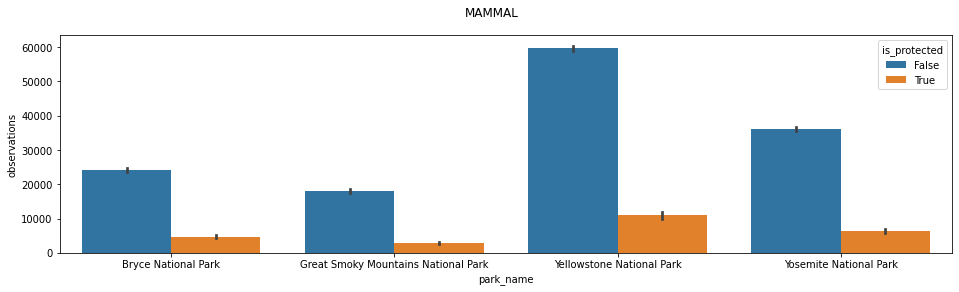

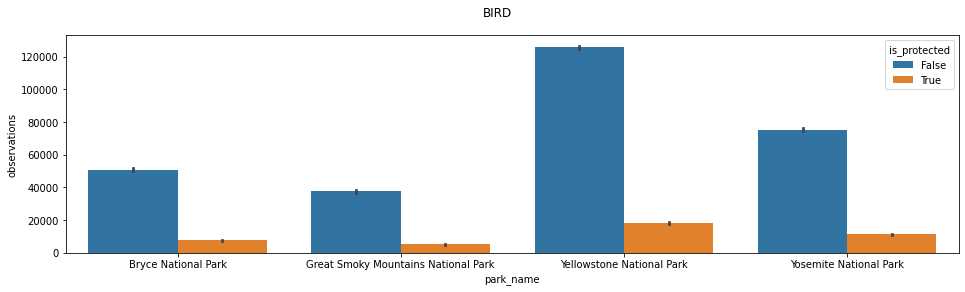

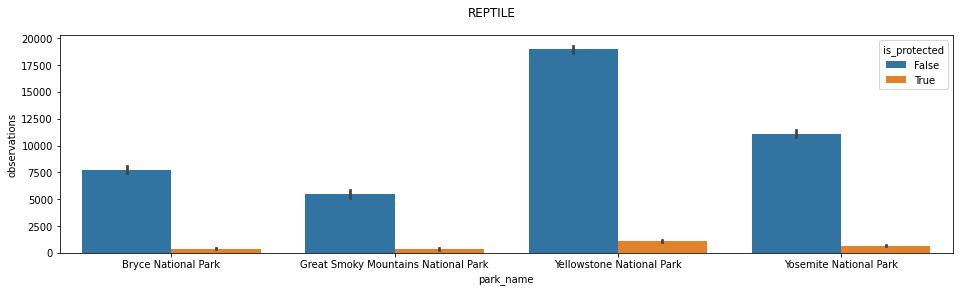

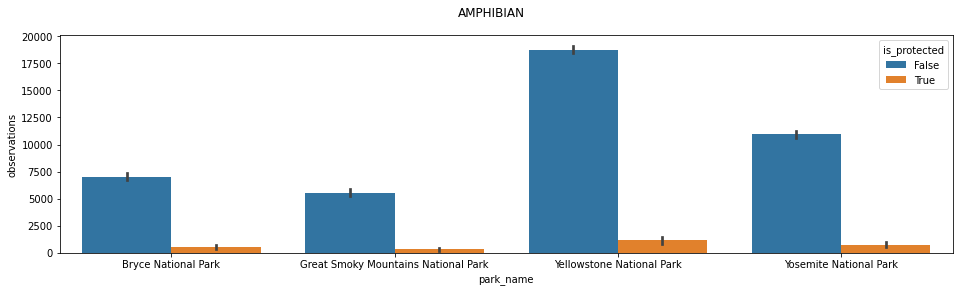

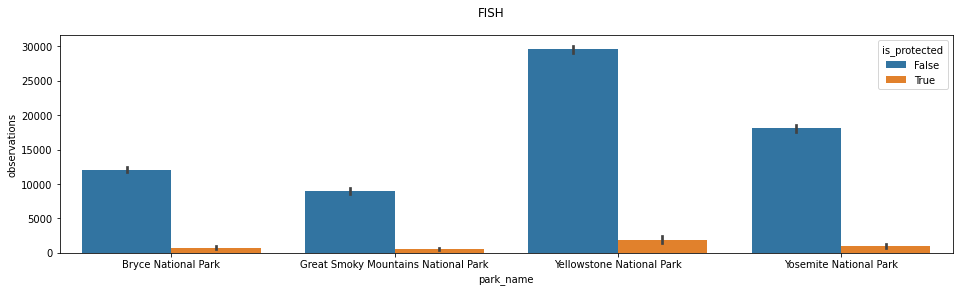

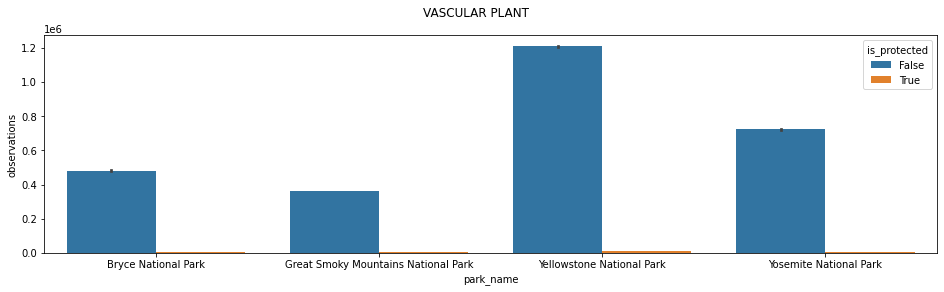

In [54]:
# loop through tickers and axes
for specie, ax in zip(species_list, axs.ravel()):
    plt.figure(figsize=(16, 4))
    # filter df for ticker and plot on specified axes
    df_viz = df_new[df_new["category"] == specie]
    df_viz= df_viz.sort_values(by=['park_name'])

    #df_new[df_new["category"] == specie].plot(ax=ax)
    
    sns.barplot(x=df_viz.park_name, y= df_viz.observations, estimator=sum, hue=df_viz.is_protected)
    # chart formatting
    ax.set_title(specie.upper())
    plt.suptitle(specie.upper())
    #ax.get_legend().remove()
    #ax.set_xlabel("")

    plt.show()
    ax.clear()

In [50]:
#sns.barplot(x=df_new[df_new.category == 'Bird'].park_name, y= df_new[df_new.category == 'Bird'].observations, hue=df_new[df_new.category == 'Bird'].is_protected)

#### Species in Parks
The next set of analysis will come from data from the conservationists as they have been recording sightings of different species at several national parks for the past 7 days.

The first step is to look at the the common names from species to get an idea of the most prevalent animals in the dataset. The data will be need to be split up into individual names.

In [62]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Bird"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6]

[['Brewsters', 'Warbler'],
 ['Coopers', 'Hawk'],
 ['Northern', 'Goshawk'],
 ['SharpShinned', 'Hawk'],
 ['Golden', 'Eagle'],
 ['RedTailed', 'Hawk']]

In [63]:
# remove duplicates in common names

In [64]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Brewsters', 'Warbler'],
 ['Coopers', 'Hawk'],
 ['Northern', 'Goshawk'],
 ['SharpShinned', 'Hawk'],
 ['Golden', 'Eagle'],
 ['RedTailed', 'Hawk']]

In [65]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Brewsters', 'Warbler', 'Coopers', 'Hawk', 'Northern', 'Goshawk']

In [67]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
209,Warbler,59
354,Sparrow,29
38,American,21
358,Northern,20
161,Owl,18
87,Common,18
139,Flycatcher,18
160,Western,12
331,Woodpecker,12
184,Sandpiper,11


In the data, there are several different scientific names for different types of warblers.  The next task is to figure out which rows of `species` are referring to warblers. A new column made up of boolean values will be created to check if `is_warbler` is `True`.

Below is a sample picture of a warbler [3]

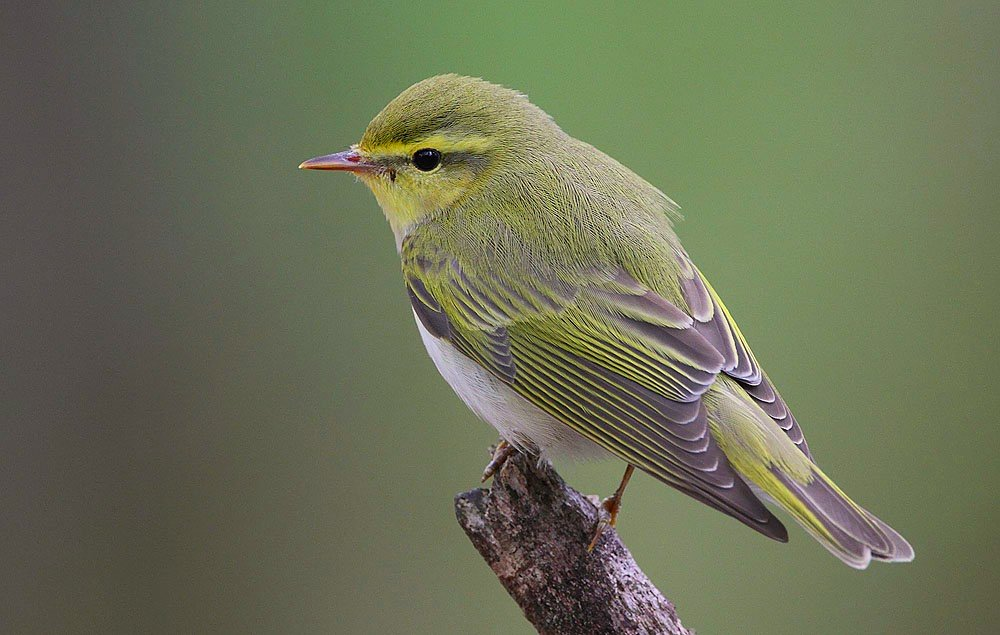

In [68]:
species['is_warbler'] = species.common_names.str.contains(r"\bWarbler\b", regex = True)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_warbler
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,least-concern,False,False
1,Mammal,Bos bison,"American Bison, Bison",least-concern,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",least-concern,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",least-concern,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,least-concern,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,least-concern,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",least-concern,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


Here is a subset of the data where is_warbler is true, returning see the rows that matched. There seems to be some species of warblers and a mix of protected vs. non-protected species.

In [69]:
species[species.is_warbler]

,category,scientific_name,common_names,conservation_status,is_protected,is_warbler
90,Bird,Vermivora pinus X chrysoptera,Brewster's Warbler,least-concern,False,True
247,Bird,Dendroica caerulescens,Black-Throated Blue Warbler,least-concern,False,True
248,Bird,Dendroica castanea,Bay-Breasted Warbler,least-concern,False,True
249,Bird,Dendroica cerulea,Cerulean Warbler,least-concern,False,True
250,Bird,Dendroica coronata,Yellow-Rumped Warbler,least-concern,False,True
251,Bird,Dendroica discolor,Prairie Warbler,least-concern,False,True
252,Bird,Dendroica dominica,Yellow-Throated Warbler,least-concern,False,True
253,Bird,Dendroica fusca,Blackburnian Warbler,least-concern,False,True
254,Bird,Dendroica magnolia,Magnolia Warbler,least-concern,False,True
255,Bird,Dendroica palmarum,Palm Warbler,least-concern,False,True


In [70]:
warbler_observations = observations.merge(species[species.is_warbler])
warbler_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_warbler
0,Vermivora celata,Yosemite National Park,106,Bird,Orange-Crowned Warbler,least-concern,False,True
1,Vermivora celata,Great Smoky Mountains National Park,76,Bird,Orange-Crowned Warbler,least-concern,False,True
2,Vermivora celata,Yellowstone National Park,281,Bird,Orange-Crowned Warbler,least-concern,False,True
3,Vermivora celata,Bryce National Park,121,Bird,Orange-Crowned Warbler,least-concern,False,True
4,Setophaga dominica,Yosemite National Park,140,Bird,Yellow-Throated Warbler,least-concern,False,True
...,...,...,...,...,...,...,...,...
231,Oreothlypis virginiae,Bryce National Park,84,Bird,Virginia's Warbler,least-concern,False,True
232,Setophaga petechia,Great Smoky Mountains National Park,82,Bird,Yellow Warbler,least-concern,False,True
233,Setophaga petechia,Yellowstone National Park,245,Bird,Yellow Warbler,least-concern,False,True
234,Setophaga petechia,Bryce National Park,134,Bird,Yellow Warbler,least-concern,False,True


In the following we want to see how many warbler sighting are made in each national park

The total number of warblers observed in each park over the past 7 days are in the table below. Yellowstone National Park seems to have the largest with 14,487 observations and the Great Smoky Mountains National Park having the lowest with 4,435. 

In [71]:
warbler_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,5760
1,Great Smoky Mountains National Park,4435
2,Yellowstone National Park,14487
3,Yosemite National Park,8712


Now let's see each park broken down by protected warblers vs. non-protected warblers sightings. 
Not many warblers are protected

In [72]:
obs_by_park = warbler_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,5565
1,Bryce National Park,True,195
2,Great Smoky Mountains National Park,False,4290
3,Great Smoky Mountains National Park,True,145
4,Yellowstone National Park,False,13995
5,Yellowstone National Park,True,492
6,Yosemite National Park,False,8441
7,Yosemite National Park,True,271


In the end I want to look into sightings of Hawks

In [73]:
species['is_hawk'] = species.common_names.str.contains(r"\bHawk\b", regex = True)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_warbler,is_hawk
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,least-concern,False,False,False
1,Mammal,Bos bison,"American Bison, Bison",least-concern,False,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",least-concern,False,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",least-concern,False,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,least-concern,False,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,least-concern,False,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",least-concern,False,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False,False


In [78]:
species[(species.is_hawk) & (species.category=="Bird")]

,category,scientific_name,common_names,conservation_status,is_protected,is_warbler,is_hawk
91,Bird,Accipiter cooperii,Cooper's Hawk,Species of Concern,True,False,True
93,Bird,Accipiter striatus,Sharp-Shinned Hawk,Species of Concern,True,False,True
95,Bird,Buteo jamaicensis,Red-Tailed Hawk,least-concern,False,False,True
96,Bird,Buteo lineatus,Red-Shouldered Hawk,Species of Concern,True,False,True
97,Bird,Buteo platypterus,Broad-Winged Hawk,least-concern,False,False,True
3078,Bird,Buteo lagopus,Rough-Legged Hawk,Species of Concern,True,False,True
3079,Bird,Buteo regalis,Ferruginous Hawk,least-concern,False,False,True
3080,Bird,Buteo swainsoni,Swainson's Hawk,least-concern,False,False,True


In [79]:
hawk_observations = observations.merge(species[(species.is_hawk) & (species.category=="Bird")])
hawk_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_warbler,is_hawk
0,Accipiter cooperii,Bryce National Park,95,Bird,Cooper's Hawk,Species of Concern,True,False,True
1,Accipiter cooperii,Yosemite National Park,138,Bird,Cooper's Hawk,Species of Concern,True,False,True
2,Accipiter cooperii,Yellowstone National Park,245,Bird,Cooper's Hawk,Species of Concern,True,False,True
3,Accipiter cooperii,Great Smoky Mountains National Park,65,Bird,Cooper's Hawk,Species of Concern,True,False,True
4,Buteo regalis,Yosemite National Park,153,Bird,Ferruginous Hawk,least-concern,False,False,True
5,Buteo regalis,Yellowstone National Park,271,Bird,Ferruginous Hawk,least-concern,False,False,True
6,Buteo regalis,Bryce National Park,120,Bird,Ferruginous Hawk,least-concern,False,False,True
7,Buteo regalis,Great Smoky Mountains National Park,80,Bird,Ferruginous Hawk,least-concern,False,False,True
8,Buteo lineatus,Great Smoky Mountains National Park,31,Bird,Red-Shouldered Hawk,Species of Concern,True,False,True
9,Buteo lineatus,Yosemite National Park,109,Bird,Red-Shouldered Hawk,Species of Concern,True,False,True


Compared with warblers there are fewer sightings of hawks

In [81]:
hawk_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,767
1,Great Smoky Mountains National Park,586
2,Yellowstone National Park,1941
3,Yosemite National Park,1103


Now let's see each park broken down by protected hawks vs. non-protected hawks sightings. It seems that every park has more sightings of unprotected hawks than protected.

In [82]:
obs_by_park = hawk_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,428
1,Bryce National Park,True,339
2,Great Smoky Mountains National Park,False,352
3,Great Smoky Mountains National Park,True,234
4,Yellowstone National Park,False,1030
5,Yellowstone National Park,True,911
6,Yosemite National Park,False,602
7,Yosemite National Park,True,501


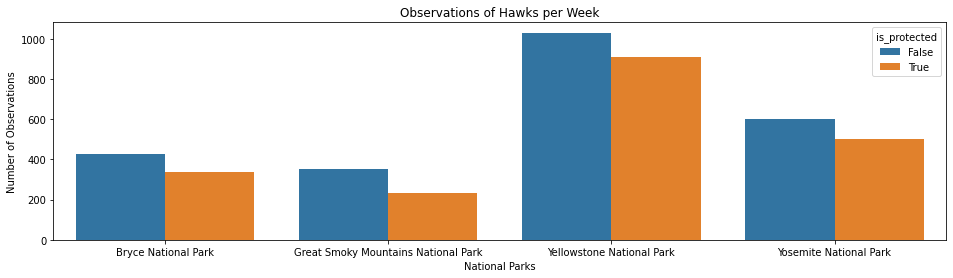

In [85]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected, estimator=sum)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Hawks per Week')
plt.show()

## Sources

[1] [Least-concern_species](https://en.wikipedia.org/wiki/Least-concern_species) <br>
[2] [biology_online](https://www.biologyonline.com/dictionary/vascular-plants) <br>
[3] [warbler](https://upload.wikimedia.org/wikipedia/commons/e/e0/Flickr_-_Rainbirder_-_Wood_Warbler_%28Phylloscopus_sibilatrix%29.jpg)